In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [29]:
data = pd.read_csv('C:/Users/sansk/OneDrive/Desktop/CapstoneCombine/extracted_1.csv') 

In [30]:
y = data.iloc[:, -1]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Drop the name columns (first two columns)
X = data.iloc[:, 2:-1]  

In [31]:
# Step 3: Impute Missing Values (if any)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different imputation strategy if needed
X = imputer.fit_transform(X)

In [32]:
# Step 4: Feature Selection using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [33]:
feature_importances = rf_model.feature_importances_

# Step 5: Select Important Features
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(rf_model, threshold='median')  # You can adjust the threshold as needed
selector.fit(X, y)
X_selected = selector.transform(X)

In [34]:
# Step 6: Use Extra Trees as the Classifier
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Step 7: Perform Classification using Extra Trees and Selected Features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

extra_trees_classifier.fit(X_train, y_train)

predictions = extra_trees_classifier.predict(X_test)

In [35]:
print(predictions)

[0 3 4 3 3 3 4 4 0 1 1 0 4 4 4 3 0 4 4 2 3 4 4 4 0 0 4 0 1 0 4 0 1 4 4 4 0
 1 2 4 2 4 0 2 0 3 2 3 3]


In [36]:
# Step 8: Evaluate the Classifier and Create a Confusion Matrix
accuracy = accuracy_score(y_test, predictions)
confusion = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
#print("Confusion Matrix:")
#print(confusion)

# You can also print a classification report for more detailed metrics
report = classification_report(y_test, predictions, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

Accuracy: 0.9387755102040817
Classification Report:
              precision    recall  f1-score   support

     Class 1       0.92      1.00      0.96        11
     Class 2       1.00      1.00      1.00         5
     Class 3       0.80      0.80      0.80         5
     Class 4       0.89      0.89      0.89         9
     Class 5       1.00      0.95      0.97        19

    accuracy                           0.94        49
   macro avg       0.92      0.93      0.92        49
weighted avg       0.94      0.94      0.94        49



In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [38]:
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9387755102040817
Precision: 0.9404761904761904
Recall: 0.9387755102040817
F1-Score: 0.9389433799371688


In [39]:
 #Calculate accuracy, precision, recall, and F1-score for each class
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)

print("Accuracy:", accuracy)
print("Precision for each class:", precision)
print("Recall (Sensitivity) for each class:", recall)
print("F1-Score for each class:", f1)

Accuracy: 0.9387755102040817
Precision for each class: [0.91666667 1.         0.8        0.88888889 1.        ]
Recall (Sensitivity) for each class: [1.         1.         0.8        0.88888889 0.94736842]
F1-Score for each class: [0.95652174 1.         0.8        0.88888889 0.97297297]


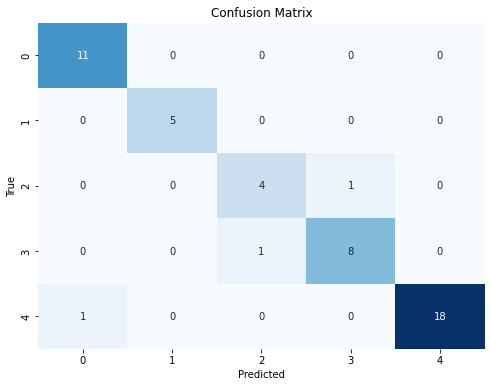

In [40]:
#Visualize the confusion matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()